<a href="https://colab.research.google.com/github/Alisa-Shikanyan/ABD-4-students-grades/blob/main/Hypothesis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ факторов, влияющих на успеваемость студентов

## Подготовка к работе

In [1]:
# Импорт необходимых для работы библиотек

import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Отключение предупреждений в итоговом отчёте

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Выгрузка предобработанной версии датасета `jamb`
import os
try:
    jamb = pd.read_csv('/Users/mimikhailova/ВШЭ/jamb.csv')
except:
    try:
        jamb = pd.read_csv('jamb.csv')
    except:
        try:
            for dirname, _, filenames in os.walk('/kaggle/input'):
                for filename in filenames:
                    print(os.path.join(dirname, filename))
            jamb = pd.read_csv('/kaggle/input/jamb-pred/jamb.csv')
        except:
            # Загрузим файл с данными
            from google.colab import files
            uploaded = files.upload()

            # Чтение CSV-файла
            jamb = pd.read_csv("jamb.csv")
jamb.head()

/kaggle/input/jamb-pred/jamb.csv


,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,Unknown,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [4]:
jamb.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,Unknown,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


## Проверка гипотез

### Верно ли, что студенты, проживающие ближе к месту обучения, сдают экзамены лучше?

**Предпосылки:**  студенты, которые живут далеко от школы, начинают свой день раньше остальных. Не исключено, что из-за этого они меньше спят и соответственно меньше отдыхают. Утренняя дорога - это нагрузка на организм, которая приводит к снижению уровня энергии, с которой студент начинает учебный день. Из-за этого он может быть менее сконцентрирован и вовлечен в процесс, а значит может и хуже усваивать материал.

Медианное значение расстояния равно 10.0 км, то есть ровно половина студентов проживает на расстоянии менее 10 км от школы, а ровно половина – более. Сделаем срезы на основании этого значения:

In [5]:
distance_less = jamb[jamb['distance_to_school'] <= 10]
distance_more = jamb[jamb['distance_to_school'] > 10]

Чтобы сформулировать гипотезы и выбрать нужный тест, проверим данные на нормальность с помощью теста Шапиро-Уилка:

In [6]:
# Тест Шапиро-Уилка

shapiro_less = st.shapiro(distance_less['jamb_score'])
print(f"Для расстояния <=10 км: statistic = {shapiro_less.statistic}, p-value = {shapiro_less.pvalue}")

shapiro_more = st.shapiro(distance_more['jamb_score'])
print(f"Для расстояния >10 км:statistic = {shapiro_more.statistic}, p-value = {shapiro_more.pvalue}")

alpha = 0.05

if shapiro_less.pvalue < alpha:
    print("Данные в группе c расстоянием не более 10 км до школы не распределены нормально")
else:
    print("Данные в группе c расстоянием не более 10 км до школы распределены нормально")

if shapiro_more.pvalue < alpha:
    print("Данные в группе c расстоянием более 10 км до школы не распределены нормально")
else:
    print("Данные в группе c расстоянием более 10 км до школы распределены нормально")

Для расстояния <=10 км: statistic = 0.9704512878956744, p-value = 1.7251723901474076e-22
Для расстояния >10 км:statistic = 0.9645573587805363, p-value = 4.213763940127312e-24
Данные в группе c расстоянием не более 10 км до школы не распределены нормально
Данные в группе c расстоянием более 10 км до школы не распределены нормально


Видим, что данные обеих групп не распределены нормально, поэтому использовать t-тест нежелательно.

В таком случае воспользуемся **тестом Манна-Уитни** для сравнения двух независимых групп. Сформулируем гипотезы:

**Нулевая гипотеза Н0:** распределения баллов JAMB у студентов, проживающих ≤10 км и >10 км от школы, одинаковы.

**Альтернативная правосторонняя гипотеза Н1**: у студентов, которые живут ближе к школе (≤10 км), распределение баллов за экзамен смещено в сторону более высоких значений по сравнению с распределением баллов у студентов, проживающих >10 км от школы.

In [7]:
# Тест Манна-Уитни для двух независимых выборок

alpha = 0.05

result = st.mannwhitneyu(distance_less['jamb_score'], distance_more['jamb_score'], alternative='greater')

print(f"U-статистика: {result.statistic:.2f}, p-значение: {result.pvalue}")

if result.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

U-статистика: 3390343.50, p-значение: 8.99400123779393e-08
Отвергаем нулевую гипотезу


📌 **Выводы:**
* Результаты теста Манна-Уитни показали статистически значимое различие между баллами JAMB студентов, проживающих на расстоянии менее или равном 10 км от школы, и студентов, проживающих дальше. Р-значение значительно меньше уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Баллы студентов, живущих ближе к школе, статистически выше, чем баллы студентов, живущих на большем расстоянии.

**Гипотеза 2:**
Мужчины и женщины демонстрируют статистически значимые различия в успеваемости, выраженные через количество выполненных заданий (assignments_completed), при этом мужчины тратят больше времени на обучение (study_hours_per_week), но женщины показывают более высокую посещаемость (attendance_rate) и чаще используют дополнительные ресурсы (access_to_learning_materials).

**Предпосылки:**
1. Социальные факторы : Традиционно считается, что девушки склонны к более дисциплинированному подходу к учебе, что может проявляться в более высокой посещаемости и регулярности выполнения домашних заданий.
2. Разница в мотивации и поведении : Мужчины могут уделять больше внимания самообразованию вне формальной системы (например, самостоятельное изучение предметов), что может отражаться в большем количестве часов, потраченных на учебу.
3. Доступ к ресурсам : Женщины могут быть более активными в использовании доступных материалов, поскольку они чаще зависят от структурированных методов обучения.
4. Успех в образовании : Некоторые исследования показывают, что женщины имеют тенденцию к лучшей успеваемости в школах, особенно в гуманитарных и социальных науках, что может коррелировать с числом выполненных заданий.

Нормальность для мужчин: False
Нормальность для женщин: False


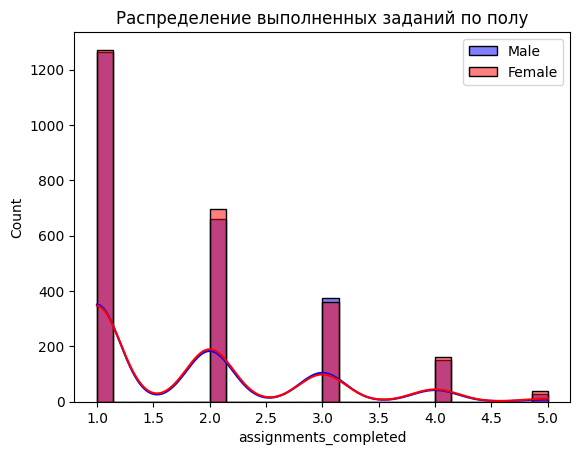

In [8]:
# Разделение данных по полу
male_assignments = jamb[jamb['gender'] == 'Male']['assignments_completed']
female_assignments = jamb[jamb['gender'] == 'Female']['assignments_completed']

# Проверка нормальности распределения
def check_normality(data):
    stat, p = stats.shapiro(data)
    return p > 0.05  # Если p > 0.05, то нормальное распределение

is_male_normal = check_normality(male_assignments)
is_female_normal = check_normality(female_assignments)

print("Нормальность для мужчин:", is_male_normal)
print("Нормальность для женщин:", is_female_normal)

# График распределения
sns.histplot(male_assignments, kde=True, label='Male', color='blue')
sns.histplot(female_assignments, kde=True, label='Female', color='red')
plt.title('Распределение выполненных заданий по полу')
plt.legend()
plt.show()

In [9]:
# Выбор теста
if is_male_normal and is_female_normal:
    # T-тест
    t_stat, p_val = stats.ttest_ind(male_assignments, female_assignments, equal_var=False)
    print(f"✅ T-тест: t={t_stat:.3f}, p={p_val:.3f}")
else:
    # Тест Манна-Уитни
    u_stat, p_val = stats.mannwhitneyu(male_assignments, female_assignments)
    print(f"✅ Тест Манна-Уитни: U={u_stat:.3f}, p={p_val:.3f}")

# Интерпретация результата
alpha = 0.05
if p_val < alpha:
    print("🔹 Отвергаем нулевую гипотезу: есть значимая разница между полами.")
else:
    print("🔸 Не отвергаем нулевую гипотезу: разница не является статистически значимой.")

✅ Тест Манна-Уитни: U=3098038.000, p=0.572
🔸 Не отвергаем нулевую гипотезу: разница не является статистически значимой.


p = 0.572 — это значение больше стандартного уровня значимости α = 0.05 .
Это означает, что разница между мужчинами и женщинами в количестве выполненных заданий (assignments_completed) :
Не является статистически значимой ,
То есть мы не можем утверждать , что различия, если они есть, вызваны полом.


In [10]:
# Сравнение study_hours_per_week
male_study = jamb[jamb['gender'] == 'Male']['study_hours_per_week']
female_study = jamb[jamb['gender'] == 'Female']['study_hours_per_week']

# Сравнение attendance_rate
male_attendance = jamb[jamb['gender'] == 'Male']['attendance_rate']
female_attendance = jamb[jamb['gender'] == 'Female']['attendance_rate']

# Сравнение access_to_learning_materials
male_access = jamb[jamb['gender'] == 'Male']['access_to_learning_materials'].map({'Yes': 1, 'No': 0})
female_access = jamb[jamb['gender'] == 'Female']['access_to_learning_materials'].map({'Yes': 1, 'No': 0})

# Пример: сравнение часов обучения
print("\nСравнение времени на обучение:")
if check_normality(male_study) and check_normality(female_study):
    t_stat, p_val = stats.ttest_ind(male_study, female_study)
else:
    u_stat, p_val = stats.mannwhitneyu(male_study, female_study)
print(f"p = {p_val:.3f}")


Сравнение времени на обучение:
p = 0.441


Анализ показал, что различие в количестве часов, потраченных на учебу, между мужчинами и женщинами не является статистически значимым (p = 0.441). Таким образом, на основе имеющихся данных нельзя утверждать, что пол ученика влияет на продолжительность самостоятельной работы над учебным материалом.

# Гипотеза (К)
Высокий социально-экономическийй статус даёт больше возможностей при выборе преподавателя 

**Предпосылки:** чем лучше экономическое положение семьи тем (предположительно) больше возможность выбора учебного заведения, а значит и подбора качественных учителей. Так же предположительно более квалифицированные учителя могут получить место в учебном заведении с более высоким престижем (короче, быстрый тест на экономическое неравенство)
**Нулевая гипотеза:** между социально-экономическим статусом и доступом к более профессиональным учителям нет явной связи.
**Альтернативная:** социально-экономический статус влияет на доступность более квалифицированных преподавателей.

Обоснование возможности применения chi2_contingency 

Тест на независимость (он же test of independence/association) — непараметрический, одновыборочный тест, который проверяет наличие связи между двумя категориальными переменными. В Python реализован функцией scipy.stats.chi2_contingency [https://habr.com/ru/companies/mygames/articles/677074/](http://)

Поскольку мы имеем дело с двумя переменными которые можно интерпретировать как категориальные, то мы можем применить chi2_contingency

teacher_quality - содержит ограниченное кол-во дискретных значений, связанных с разными вариантами (категориями) квалификации.

Также отличием этого теста от Т-критерия может быть в случаях если связь между переменными есть, но значимого отличия в средних значениях нет, что может быть значимым, учитывая что у нас отсутствуют данные о точной методике классификации людей по социо-экономическим статусам в данном датасете. 


Предпосылки: чем лучше экономическое положение семьи тем (предположительно) больше возможность выбора учебного заведения, а значит и подбора качественных учителей. Так же предположительно более квалифицированные учителя могут получить место в учебном заведении с более высоким престижем (короче, быстрый тест на экономическое неравенство)
Нулевая гипотеза: между социально-экономическим статусом и доступом к более профессиональным учителям нет явной связи.
Альтернативная: социально-экономический статус влияет на доступность более квалифицированных преподавателей.

Chi-square: 28.359807399322296 p-value: 0.0004104540904780333
Корреляция есть.


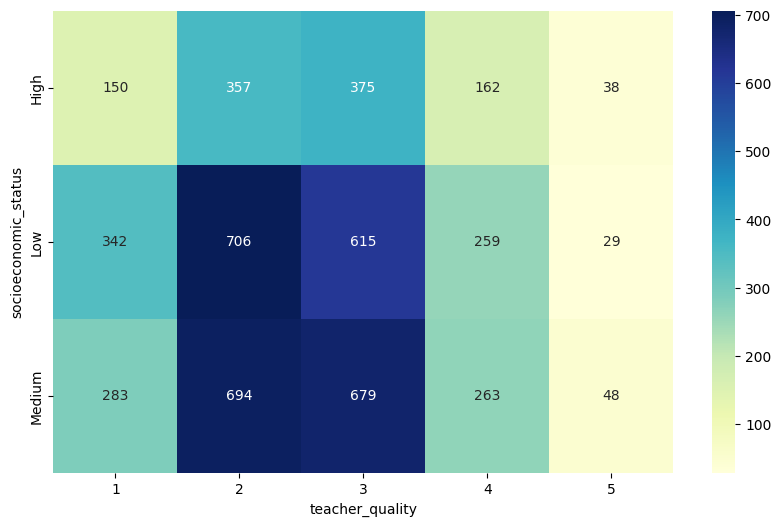

In [11]:
print('''Предпосылки: чем лучше экономическое положение семьи тем (предположительно) больше возможность выбора учебного заведения, а значит и подбора качественных учителей. Так же предположительно более квалифицированные учителя могут получить место в учебном заведении с более высоким престижем (короче, быстрый тест на экономическое неравенство)
Нулевая гипотеза: между социально-экономическим статусом и доступом к более профессиональным учителям нет явной связи.
Альтернативная: социально-экономический статус влияет на доступность более квалифицированных преподавателей.
''')
from scipy.stats import chi2_contingency

X = pd.crosstab(jamb.socioeconomic_status, jamb.teacher_quality)
chi2, p, dof, expected = chi2_contingency(X)
print('Chi-square:', chi2, 'p-value:', p)
if p<0.05:
    print('Корреляция есть.')
else:
    print('Нулевая гипотеза - связь не подтверждена')


plt.figure(figsize=(10, 6))
sns.heatmap(X, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [12]:
expected 

array([[167.71  , 380.2148, 361.1716, 148.0176,  24.886 ],
       [302.405 , 685.5814, 651.2438, 266.8968,  44.873 ],
       [304.885 , 691.2038, 656.5846, 269.0856,  45.241 ]])

In [13]:
jamb['socioeconomic_status'] = jamb.socioeconomic_status.map({'Low': 0, 'Medium': 1, 'High': 2})
if stats.shapiro(jamb.socioeconomic_status).pvalue > 0.05 and stats.shapiro(jamb.teacher_quality).pvalue > 0.05:
    print('Распределение нормально')
    correlation, p = stats.ttest_ind(jamb.socioeconomic_status, jamb.teacher_quality)
else:
    print('Распределение нормальным не является')
    correlation, p = stats.mannwhitneyu(jamb.socioeconomic_status, jamb.teacher_quality)


if p<0.05:
    print('Корреляция есть.')
else:
    print('Нулевая гипотеза - связь не подтверждена')

Распределение нормальным не является
Корреляция есть.


**Выводы:** Анализ показал, что существует статистически значимая связь квалификации преподавателей с социально-экономическим статусом как по средним значениям, так и по отдельным категориям. Сравнивая фактическое распределение с ожидаемым в хи-квадрат тесте мы можем констатировать что низкий, средний и высокий социальные статусы с большей вероятностью получат синонимичный уровень подготовки преподавательского состава. Манна - Уитни дополнительно подтверждает что зависимость уровня квалификации преподавателей от уровня социально-экономического статуса существует.

**Проверка Гипотез (Артём)**
# **Верно ли, что студенты, обучающиеся в частных школах, имеют более высокие шансы сдать экзамен успешно?**
**Предпосылки:**

Представьте, что вы член приёмной коммисии. Вы хотите отобрать себе самых умных студентов, чтобы они поднимали ваш инстут в рейтинге лучших: побеждали на международных олимпиадах, писали лучшие научные работы, совершали новые открытия в науке.

Вы принимаете в свой институт по резюме, которое, как вы считаете, более полно отражет опыт абитуриента. Кому вы отдадите предпочтение: ученику из частной школы или из государственной?

В самом деле, существует некий стереотип: в частных школах качество обучения лучше, чем в государственных. Ведь частные школы берут деньги за индивидуальный подход к обучению, за, более высоквалифицированных и вовлечённых преподавателе, за более качественную инфраструктуру и общее оснащение.

В своей гипотезе, на примере имеющейся выборки, я хочу узнать: **Верно ли, что студенты, обучающиеся в частных школах, имеют более высокие шансы сдать экзамен успешно?**

**Гипотезы**

Н0: Нет разницы между средними баллами JAMB у студентов из государственных и частных школ.

Н1: Средний балл JAMB у студентов из частных школ ниже , чем у студентов из государственных.

In [14]:
from scipy import stats as st
# Срезы по типу школы
public = jamb[jamb['school_type'] == 'Public']['jamb_score']
private = jamb[jamb['school_type'] != 'Public']['jamb_score']

# Тест Шапиро-Уилка для проверки нормальности распределения
shapiro_public = st.shapiro(public)
print(f"Государственная школа: statistic = {shapiro_public.statistic:.4f}, p-value = {shapiro_public.pvalue:.2e}")

shapiro_private = st.shapiro(private)
print(f"Частная школа: statistic = {shapiro_private.statistic:.4f}, p-value = {shapiro_private.pvalue:.2e}")

alpha = 0.05

if shapiro_public.pvalue < alpha:
    print("Данные в группе с государственными школами не распределены нормально")
else:
    print("Данные в группе с государственными школами распределены нормально")

if shapiro_private.pvalue < alpha:
    print("Данные в группе с частными школами не распределены нормально")
else:
    print("Данные в группе с частными школами распределены нормально")


# Если хотя бы одна группа не нормальна — используем тест Манна-Уитни
result = st.mannwhitneyu(private, public, alternative='less')

print(f"\nU-статистика: {result.statistic:.2f}, p-значение: {result.pvalue:.2e}")

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Государственная школа: statistic = 0.9646, p-value = 2.36e-29
Частная школа: statistic = 0.9760, p-value = 1.17e-13
Данные в группе с государственными школами не распределены нормально
Данные в группе с частными школами не распределены нормально

U-статистика: 2629333.00, p-значение: 1.00e+00
Не получилось отвергнуть нулевую гипотезу


Сначала я использую тест Шапиро-Уилка — это статистический тест для проверки нормальности распределения . Он помогает определить, похожи ли данные на нормальное распределение. В данном случае - распределение баллов в частных и государственных школах.

Увидев, что распределение не нормально, использую тест Манна-Уитни — это непараметрический тест , который используется для сравнения двух независимых групп , когда распределение не является нормальным. Вместо сравнения средних значений, как делает t-тест, тест Манна-Уитни сравнивает ранги.

Принцип работы: Все значения из обеих групп объединяются. Каждому значению присваивается ранг, где чем выше значение — тем выше ранг. Вычисляется U-статистика , которая говорит о том, насколько сильно перекрываются распределения двух групп.

Мы не считаем средние , а просто смотрим, кто чаще получает более высокие баллы.

**Выводы:** Анализ показал, что различия в результатах экзамена JAMB между студентами из частных и государственных школ не являются статистически значимыми . Несмотря на то, что выборка по частным школам представлена в достаточном количестве (25.3%), средние баллы этих студентов не превышают результаты студентов из государственных школ. Это может говорить о том, что тип образовательного учреждения не оказывает решающего влияния на итоговый результат при прочих равных условиях.